What routes are most profitable?

In [13]:
# Import the dependencies
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt

In [14]:
# Open the csv data file
csv_path = Path("../Data/CSV/cleaned_flight_data.csv")

In [15]:
# Create a DataFrame from the csv data
df = pd.read_csv(csv_path)

# Display the first 5 rows of the DataFrame
df.head()

,tbl,Year,quarter,departure_city_id,arrival_city_id,departure_city,arrival_city,departure_airport_id,arrival_airport_id,departure_airport,...,large_ms,fare_lg,carrier_low,lf_ms,fare_low,tbl1apk,departure_latitude,departure_longitude,arrival_latitude,arrival_longitude
0,Table 1a,2010,1,34614,33195,"Salt Lake City, UT","Tampa, FL (Metropolitan Area)",14869,15304,SLC,...,0.38,247.69,US Airways Group Inc.,0.20,166.99,201011486915304SLCTPA,40.758478,-111.888142,37.860600,-78.804199
1,Table 1a,1998,4,30189,31703,"Colorado Springs, CO","New York City, NY (Metropolitan Area)",11109,12197,COS,...,0.73,292.60,Northwest Airlines Inc.,0.24,248.27,199841110912197COSHPN,38.835224,-104.819798,40.123164,-75.333718
2,Table 1a,1998,4,30198,30852,"Pittsburgh, PA","Washington, DC (Metropolitan Area)",14122,10821,PIT,...,0.93,245.70,Continental Airlines Inc.,0.03,71.30,199841412210821PITBWI,40.442169,-79.994945,38.892062,-77.019912
3,Table 1a,2009,3,32211,32575,"Las Vegas, NV","Los Angeles, CA (Metropolitan Area)",12889,14908,LAS,...,0.58,118.28,US Airways Group Inc.,0.41,102.75,200931288914908LASSNA,36.169202,-115.140597,34.052238,-118.243344
4,Table 1a,1993,4,30255,30852,"Huntsville, AL","Washington, DC (Metropolitan Area)",12217,12264,HSV,...,0.48,275.50,United Air Lines Inc.,0.25,197.69,199341221712264HSVIAD,34.729538,-86.585283,38.892062,-77.019912


In [16]:
# Group the data by departure and arrival airports
grouped_routes = df.groupby(['departure_airport', 'arrival_airport'])

# Display the first 5 rows of the grouped data
grouped_routes.apply(lambda x: x.head())

C:\Users\User\AppData\Local\Temp\ipykernel_19096\1800778213.py:5: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  grouped_routes.apply(lambda x: x.head())


tbl  Year  quarter  \
departure_airport arrival_airport                                   
ABE               CHI             129481  Table 1a  1994        1   
                                  137455  Table 1a  1993        2   
                                  139130  Table 1a  1993        3   
                                  159206  Table 1a  1993        1   
                                  166795  Table 1a  1993        4   
...                                            ...   ...      ...   
XNA               SWF             8686    Table 1a  2005        1   
                                  11891   Table 1a  2009        4   
                                  12427   Table 1a  2008        3   
                                  17138   Table 1a  2002        2   
                                  18316   Table 1a  2011        1   

                                          departure_city_id  arrival_city_id  \
departure_airport arrival_airport                                              
ABE               CHI             129481              30135            30977   
                                  137455              30135            30977   
                                  139130              30135            30977   
                                  159206              30135            30977   
                                  166795              30135            30977   
...                                                     ...              ...   
XNA               SWF             8686                31834            31703   
                                  11891               31834            31703   
                                  12427               31834            31703   
                                  17138               31834            31703   
                                  18316               31834            31703   

                                                          departure_city  \
departure_airport arrival_airport                                          
ABE               CHI             129481  Allentown/Bethlehem/Easton, PA   
                                  137455  Allentown/Bethlehem/Easton, PA   
                                  139130  Allentown/Bethlehem/Easton, PA   
                                  159206  Allentown/Bethlehem/Easton, PA   
                                  166795  Allentown/Bethlehem/Easton, PA   
...                                                                  ...   
XNA               SWF             8686                  Fayetteville, AR   
                                  11891                 Fayetteville, AR   
                                  12427                 Fayetteville, AR   
                                  17138                 Fayetteville, AR   
                                  18316                 Fayetteville, AR   

                                                                   arrival_city  \
departure_airport arrival_airport                                                 
ABE               CHI             129481                            Chicago, IL   
                                  137455                            Chicago, IL   
                                  139130                            Chicago, IL   
                                  159206                            Chicago, IL   
                                  166795                            Chicago, IL   
...                                                                         ...   
XNA               SWF             8686    New York City, NY (Metropolitan Area)   
                                  11891   New York City, NY (Metropolitan Area)   
                                  12427   New York City, NY (Metropolitan Area)   
                                  17138   New York City, NY (Metropolitan Area)   
                                  18316   New York City, NY (Metropolitan Area)   

                                       

In [17]:
# Get the number of flights for each route
route_counts = grouped_routes[['departure_airport', 'arrival_airport', 'passengers']].count()

# Display the first 50 rows of the route counts
route_counts.head(50)

departure_airport  arrival_airport  \
departure_airport arrival_airport                                       
ABE               CHI                              5                5   
                  MCO                              5                5   
                  MDW                             15               15   
                  ORD                             15               15   
                  PIE                              5                5   
                  TPA                              5                5   
ABQ               BOS                             90               90   
                  BUR                             98               98   
                  BWI                             98               98   
                  CHI                             14               14   
                  DAL                             98               98   
                  DCA                             98               98   
                  DET                              1                1   
                  DFW                             98               98   
                  DTW                              2                2   
                  EFD                             33               33   
                  EWR                             98               98   
                  FLL                              5                5   
                  HOU                             98               98   
                  HPN                             97               97   
                  IAD                             98               98   
                  IAH                             98               98   
                  ISP                             98               98   
                  JFK                             98               98   
                  LAS                              3                3   
                  LAX                             98               98   
                  LGA                             98               98   
                  LGB                             98               98   
                  MCI                             35               35   
                  MDW                             98               98   
                  MHT                             90               90   
                  MIA                              5                5   
                  MSP                              1                1   
                  NYC                             15               15   
                  OAK                             98               98   
                  ONT                             98               98   
                  ORD                             98               98   
                  PHX                             45               45   
                  PVD                             90               90   
                  SEA                              2                2   
                  SFO                             98               98   
                  SJC                             98               98   
                  SMF                              6                6   
                  SNA                             98               98   
                  SWF                             96               96   
                  TPA                              5                5   
                  WAS                             14               14   
ACK               EWR                             16               16   
                  HPN                             13               13   
                  ISP                              2                2   

                                   passengers  
departure_airport arrival_airport              
ABE               CHI                       5  
                  MCO                       5  
                  MDW                      15 

In [18]:
# Get the total fares for each route
route_fares = grouped_routes['fare'].sum() * grouped_routes['passengers'].sum()

# Display the first 50 rows of the route fares
route_fares.head(50)

departure_airport  arrival_airport
ABE                CHI                5.936480e+03
                   MCO                1.137370e+06
                   MDW                1.330739e+05
                   ORD                8.498779e+06
                   PIE                2.531174e+05
                   TPA                1.492700e+05
ABQ                BOS                3.233614e+08
                   BUR                1.280507e+08
                   BWI                5.180366e+08
                   CHI                3.992086e+04
                   DAL                7.204495e+08
                   DCA                5.164899e+08
                   DET                2.517880e+03
                   DFW                3.865036e+08
                   DTW                8.116416e+04
                   EFD                3.310034e+05
                   EWR                3.126201e+08
                   FLL                4.246105e+05
                   HOU                3.363736e

In [19]:
# Sort the route fares from highest to lowest
sorted_route_fares = route_fares.sort_values(ascending=False)

# Display the first 50 rows of the sorted route fares
sorted_route_fares.head(50)

departure_airport  arrival_airport
LAX                JFK                1.706937e+10
JFK                SFO                1.234292e+10
ORD                LGA                7.952892e+09
BOS                SFO                7.157493e+09
EWR                SFO                7.114536e+09
LAX                EWR                6.911173e+09
ORD                LAX                6.745578e+09
                   SFO                6.177967e+09
ATL                LGA                6.111065e+09
BOS                LAX                5.692233e+09
DFW                LGA                5.584718e+09
SFO                IAD                5.437013e+09
LAX                IAD                5.217642e+09
ORD                DFW                4.849745e+09
                   EWR                4.777549e+09
ATL                LAX                4.686955e+09
BOS                LGA                4.507842e+09
                   ORD                4.363765e+09
LAX                SFO                4.281535e

In [20]:
# Create an empty dictionary to store the fares data
fares_data = {}

# Loop through the sorted route fares
for route in sorted_route_fares.index:
    # Get the route name
    route_name = route[0] + "-" + route[1]
    # Get the total fare for the route
    total_fare = sorted_route_fares[route]
    # Add the route and total fare to the fares data
    fares_data[route_name] = total_fare

In [21]:
# Return the top 10 routes with the highest total fares
top_10_routes = dict(list(fares_data.items())[0:10])
for route, fare in top_10_routes.items():
    print(f"{route}: ${fare:,.2f}")

LAX-JFK: $17,069,366,187.48
JFK-SFO: $12,342,920,693.84
ORD-LGA: $7,952,891,598.28
BOS-SFO: $7,157,493,317.36
EWR-SFO: $7,114,535,897.52
LAX-EWR: $6,911,172,558.72
ORD-LAX: $6,745,578,207.84
ORD-SFO: $6,177,967,330.08
ATL-LGA: $6,111,064,595.95
BOS-LAX: $5,692,233,083.40


C:\Users\User\AppData\Local\Temp\ipykernel_19096\4031048282.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(['${:,.0f}'.format(x) for x in ax.get_yticks()])


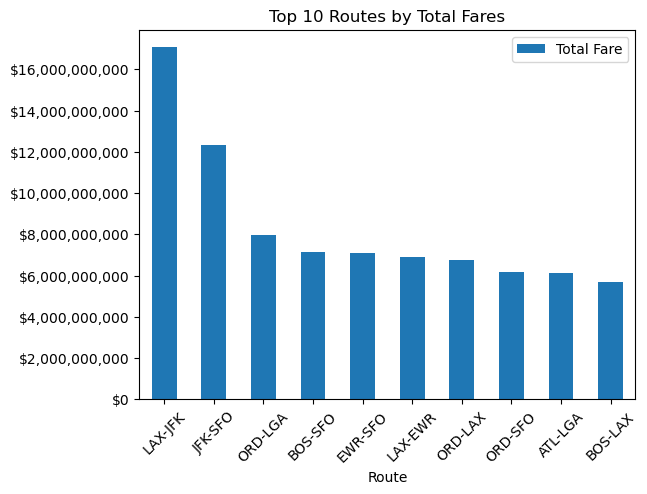

In [28]:
# Graph the top 10 routes with the highest total fares
top_10_routes_df = pd.DataFrame(list(top_10_routes.items()), columns=['Route', 'Total Fare'])
ax = top_10_routes_df.plot(kind='bar', x='Route', y='Total Fare', title='Top 10 Routes by Total Fares', rot=45)
ax.set_yticklabels(['${:,.0f}'.format(x) for x in ax.get_yticks()])

# Save the graph as a png file
plt.savefig("../Data/Images/top_10_routes_by_total_fares.png");

In [23]:
# Return the lowest 10 routes with the lowest total fares
lowest_10_routes = dict(list(fares_data.items())[-10:])
for route, fare in lowest_10_routes.items():
    print(f"{route}: ${fare:,.2f}")

FLL-TSS: $0.00
BZN-SWF: $0.00
FMY-BDL: $0.00
FMY-DCA: $0.00
FMY-JFK: $0.00
DAL-XNA: $0.00
CAE-LGB: $0.00
FTW-SFO: $0.00
MHT-SWF: $0.00
ORD-HFD: $0.00
